In [51]:
import pandas as pd
%matplotlib inline

In [52]:
a_df = pd.read_csv('data/anime.csv')
a_df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [53]:
a_df.shape

(12294, 7)

In [54]:
r_df = pd.read_csv('data/rating.csv')
r_df.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [55]:
r_df.shape

(7813737, 3)

rate.csvは各ユーザーがどのアニメにどの評価で入れたかを表している。今回は使用しない。  
genre列は使用しない。

欠損値の確認

In [56]:
a_df.isnull().any(axis=0)

anime_id    False
name        False
genre        True
type         True
episodes    False
rating       True
members     False
dtype: bool

In [57]:
a_df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

欠損値を含む列/行を削除する

In [58]:
a_df = a_df.drop('genre', axis=	1)

In [59]:
a_df = a_df.dropna(how='any', axis=0)
a_df.head()

,anime_id,name,type,episodes,rating,members
0,32281,Kimi no Na wa.,Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,TV,64,9.26,793665
2,28977,Gintama°,TV,51,9.25,114262
3,9253,Steins;Gate,TV,24,9.17,673572
4,9969,Gintama&#039;,TV,51,9.16,151266


genre列、type列を整数値にする。

In [60]:
a_df['type'].unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA'], dtype=object)

In [61]:
dummy1 = pd.get_dummies(a_df['type'], drop_first=True)
dummy1

,Music,ONA,OVA,Special,TV
0,0,0,0,0,0
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
12289,0,0,1,0,0
12290,0,0,1,0,0
12291,0,0,1,0,0
12292,0,0,1,0,0


In [62]:
a_df = pd.concat([a_df, dummy1], axis=1)

In [63]:
a_df = a_df.drop(['type'], axis=1)

In [64]:
a_df.head()

,anime_id,name,episodes,rating,members,Music,ONA,OVA,Special,TV
0,32281,Kimi no Na wa.,1,9.37,200630,0,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,64,9.26,793665,0,0,0,0,1
2,28977,Gintama°,51,9.25,114262,0,0,0,0,1
3,9253,Steins;Gate,24,9.17,673572,0,0,0,0,1
4,9969,Gintama&#039;,51,9.16,151266,0,0,0,0,1


外れ値の確認

<AxesSubplot:xlabel='members', ylabel='rating'>

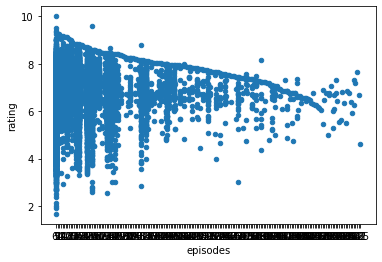

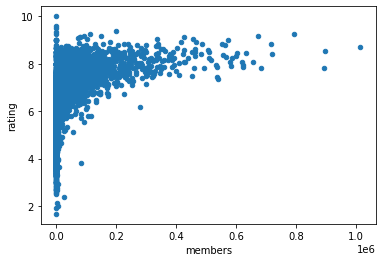

In [65]:
%matplotlib inline

a_df.plot(kind='scatter', x='episodes', y='rating')
a_df.plot(kind='scatter', x='members', y='rating')

In [66]:
a_df.isnull().any(axis=0)

anime_id    False
name        False
episodes    False
rating      False
members     False
Music       False
ONA         False
OVA         False
Special     False
TV          False
dtype: bool

特徴量と正解データを選択する。

In [67]:
xcol = ['episodes', 'members', 'Music', 'ONA', 'OVA', 'Special', 'TV']
x = a_df[xcol]
t = a_df['rating']
x

,episodes,members,Music,ONA,OVA,Special,TV
0,1,200630,0,0,0,0,0
1,64,793665,0,0,0,0,1
2,51,114262,0,0,0,0,1
3,24,673572,0,0,0,0,1
4,51,151266,0,0,0,0,1
...,...,...,...,...,...,...,...
12289,1,211,0,0,1,0,0
12290,1,183,0,0,1,0,0
12291,4,219,0,0,1,0,0
12292,1,175,0,0,1,0,0


In [68]:
t

0        9.37
1        9.26
2        9.25
3        9.17
4        9.16
         ... 
12289    4.15
12290    4.28
12291    4.88
12292    4.98
12293    5.46
Name: rating, Length: 12064, dtype: float64

'episodes'列が'Unknown'になっている行を探す

In [69]:
x[(x['episodes'] == 'Unknown')].index

Int64Index([   74,   252,   615,   991,  1021,  1272,  1309,  1928,  1930,
             1993,
            ...
            11496, 11498, 11544, 11582, 11584, 11648, 11752, 12024, 12045,
            12251],
           dtype='int64', length=188)

In [70]:
x.iloc[74]

episodes    Unknown
members      504862
Music             0
ONA               0
OVA               0
Special           0
TV                1
Name: 74, dtype: object

'Unknown'になっている行を削除する

In [71]:
no = x[(x['episodes'] == 'Unknown')].index
x = x.drop(no, axis=0)
t = t.drop(no, axis=0)

訓練データとテストデータに分割

In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, t, test_size=0.3, random_state=0)

yをcontinuousからmulticlassに変える。

In [73]:
from sklearn.preprocessing import LabelEncoder
from sklearn import utils
LE = LabelEncoder()
y_train = LE.fit_transform(y_train)
y_test = LE.fit_transform(y_test)
print(utils.multiclass.type_of_target(y_train))
print(utils.multiclass.type_of_target(y_test))

multiclass
multiclass


試しに決定木で試す

In [77]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=0)
model.fit(x_train, y_train)
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.8773006134969326
0.0028066236317709796


テストデータの正解率が悪すぎる。